# Import and definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

import functions_simulation as sim
import functions_plotting as pp
snscolors=sns.color_palette() 

# Import saved simulation results and plot

## Parameters and settings

In [2]:
savedir='simresults/'  # for importing saved simulation results

tau_patch_values=[1.5,5]
Ttravelvalues=[1,5,10]
Evalues=[0.5,2,5]

all_labels = ['sigmastrategy=1','sigmastrategy=-0.2','chunksizestrategy=1','chunksizestrategy=-0.2']  # saved simulation results files, for importing
maxparams = [0.601, 10.01]
xlabels = ['Noise: $\sigma/\\rho_0$','Chunk size: $c$']

## Figure 3

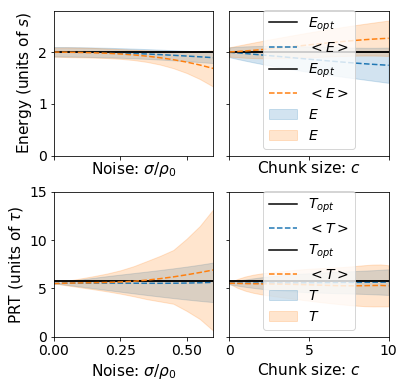

In [3]:
# choose an example to show for the main text
Enum=1
tpnum=1
Ttrnum=1
Evalue=Evalues[Enum]
tau_patch=tau_patch_values[tpnum]
Ttravel=Ttravelvalues[Ttrnum]
rho0=sim.getrho0_Eopt(Evalue,tau_patch,Ttravel)

# plot
f,ax=plt.subplots(2,2,sharex='col',sharey='row')
f.set_size_inches(6,6)
for l in range(4):
    d = np.floor_divide(l,2)
    label = all_labels[l]
    [grid_rho0values, grid_E_results, grid_T_results,label,paramvalues,wp,basenoise] = pickle.load( open(savedir+label+'.pkl', 'rb') )
    maxparam = maxparams[d]
    keep = paramvalues<=maxparam
    tpx = paramvalues[keep]
    Eresults=np.array(grid_E_results[tpnum][Ttrnum][Enum])[keep]
    Tresults=np.array(grid_T_results[tpnum][Ttrnum][Enum])[keep]
    pp.maketwoplots(tpx,xlabels[d],Eresults,Tresults,ax[0][d],ax[1][d],
                   lsize=14,smooth=0.05,colornum=np.mod(l,2))
    ax[0][d].set_xlim([0,maxparam])
    [a.set_title('') for a in ax[:,d]]
    
# labels and setting the limits
ax[0][0].set_ylim(top=2.8)
ax[1][0].set_ylim(top=15)
[a.set_ylabel('') for a in ax[:,1]]    
[a.legend().set_visible(False) for a in ax[0,0:-1]]
[a.legend().set_visible(False) for a in ax[1,0:-1]]
plt.subplots_adjust(wspace=0.1,hspace=0.25)
plt.show()

## Supplemental figures S1 and S2 

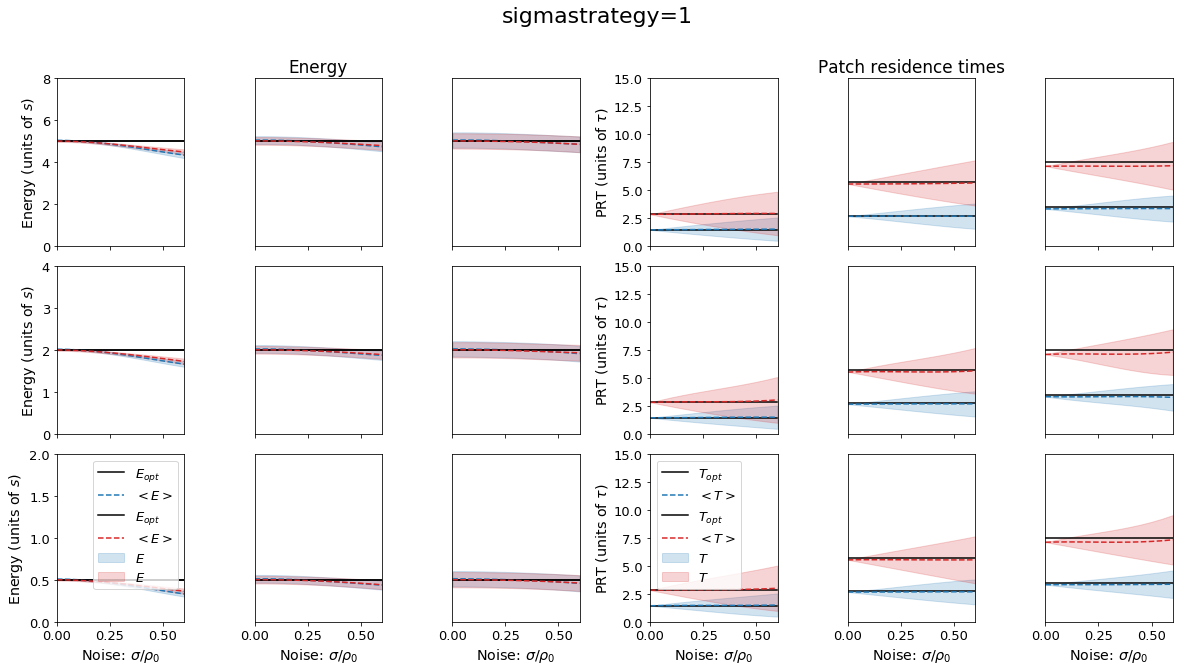

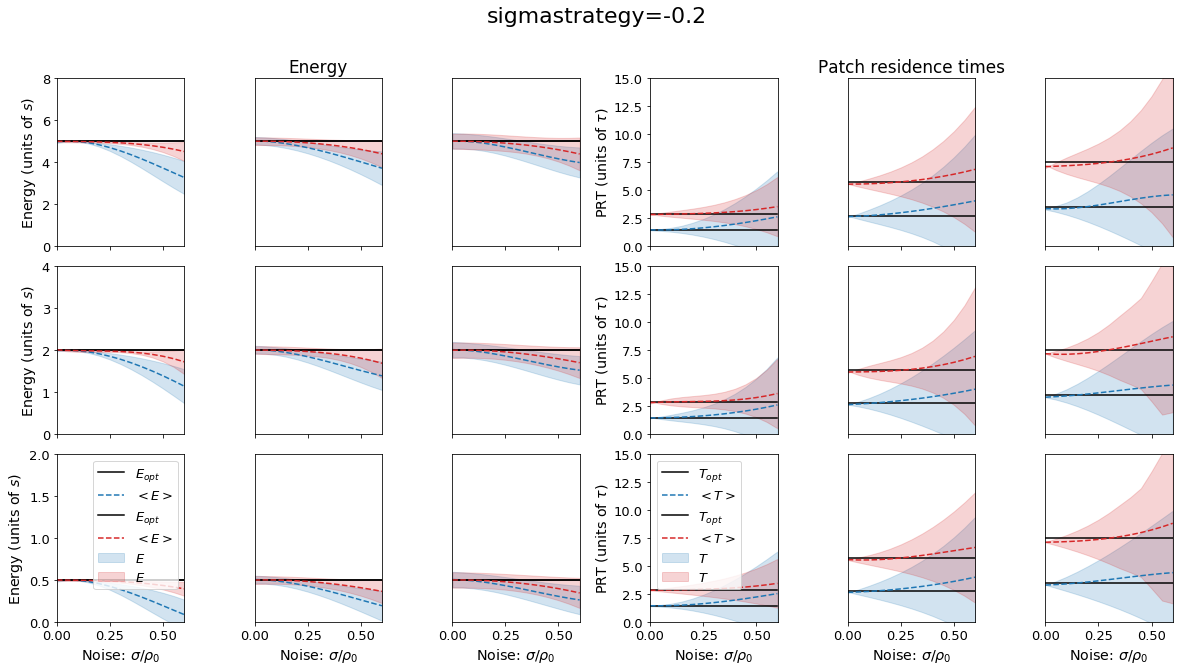

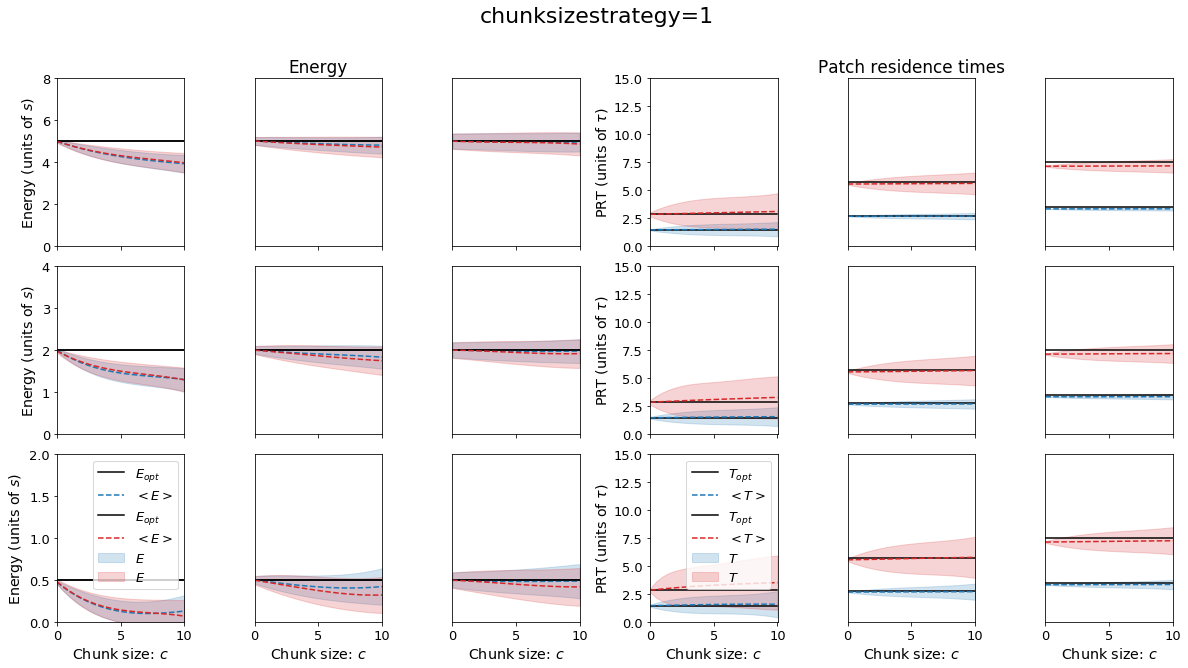

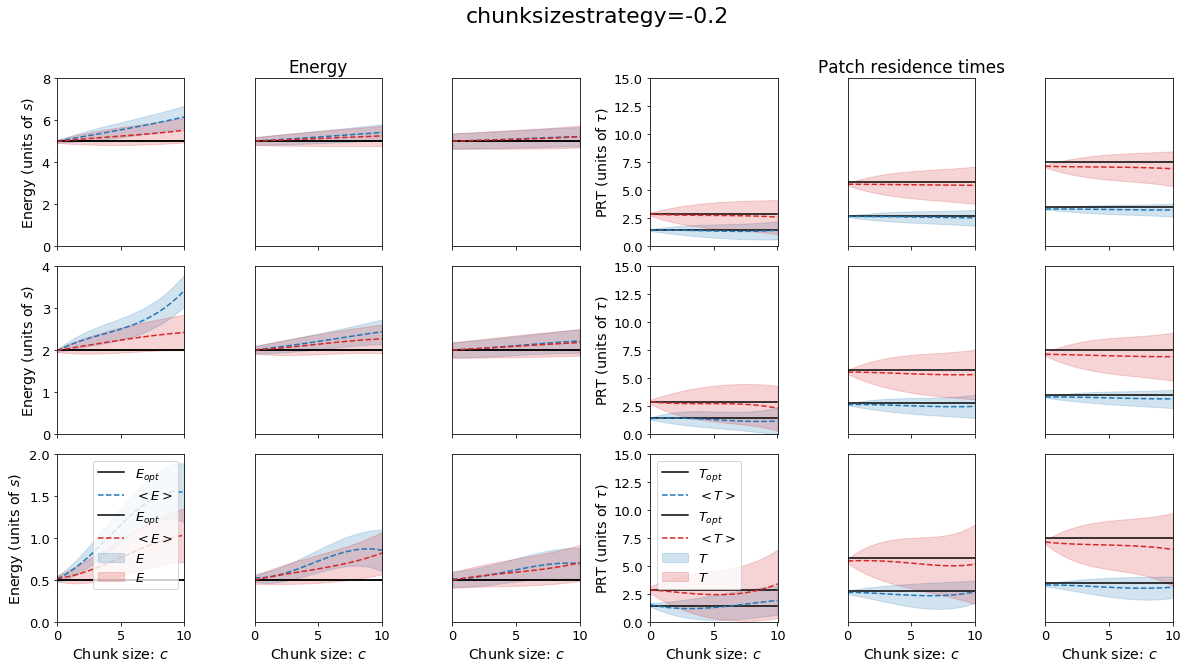

In [7]:
smoothvalues = [0.05,0.7,0.1,0.7]
xtickvalues=[[0,0.25,0.5],[0,5,10]]

l=3
for l in range(4):
    d = np.floor_divide(l,2)
    label = all_labels[l]
    [grid_rho0values, grid_E_results, grid_T_results,_,paramvalues,wp,basenoise] = pickle.load( open(savedir+label+'.pkl', 'rb') )
    maxparam = maxparams[d]
    keep = paramvalues<=maxparam
    tpx = paramvalues[keep]
    
    f,ax=plt.subplots(3,6,sharex=True)
    f.set_size_inches(20,10)  
    pp.gridplots(ax,tpx, grid_rho0values, np.array(grid_E_results)[:,:,:,keep], np.array(grid_T_results)[:,:,:,keep],
                label=xlabels[d],lsize=13,smooth=smoothvalues[l])
    ax[0,0].set_xlim([0,maxparam])
    ax[0,0].set_xticks(xtickvalues[d])
    plt.subplots_adjust(wspace=0.55,hspace=0.12)
    
    # plt.savefig('fig3suppv2-'+label+'.pdf')
    plt.suptitle(label,fontsize=22)
    plt.show()


# Run simulations and save results

In [ ]:
# simulation parameters:  time, number patches
sim.totaltime=20000  # sec   # for final results, used 20000
sim.start_for_mean=1000 # sec, for the time step to start the mean.  For final results, used 1000

#%% Run parameter studies for different strategies

#### Density-adaptive strategy - vary noise (sigma)
label='sigma'+'strategy=1'
alphachoice=1
paramvalues=np.arange(0,0.602,0.05)
wp=[1,0,0,0,0,0]  # wp="which-parameter" axis to vary
basenoise=0
grid_rho0values, grid_E_results, grid_T_results, grid_prts, grid_traveltimes = sim.gridsimulationruns(tau_patch_values, Ttravelvalues, Evalues, wp, basenoise, 
                                                                                                    paramvalues,alphachoice=alphachoice)
pickle.dump( [grid_rho0values, grid_E_results, grid_T_results,label,paramvalues,wp,basenoise], open(savedir+label+'.pkl' , "wb" ) )
print('wrote to:',label)

#### Robust-counting strategy - vary noise (sigma)
label='sigma'+'strategy=-0.2'
alphachoice=-0.2
paramvalues=np.arange(0,0.602,0.05)
wp=[1,0,0,0,0,0]
basenoise=0
grid_rho0values, grid_E_results, grid_T_results, grid_prts, grid_traveltimes = sim.gridsimulationruns(tau_patch_values, Ttravelvalues, Evalues, wp, basenoise, 
                                                                                                    paramvalues,alphachoice=alphachoice)
pickle.dump( [grid_rho0values, grid_E_results, grid_T_results,label,paramvalues,wp,basenoise], open(savedir+label+'.pkl' , "wb" ) )
print('wrote to:',label)

#### Density-adaptive strategy - vary chunk size
label='chunksize'+'strategy=1'
alphachoice=1
paramvalues=np.arange(0,10.020,0.5)
wp=[0,0,0,0,0,1]
basenoise=0
grid_rho0values, grid_E_results, grid_T_results, grid_prts, grid_traveltimes = sim.gridsimulationruns(tau_patch_values, Ttravelvalues, Evalues, wp, basenoise, 
                                                                                                    paramvalues,alphachoice=alphachoice)
pickle.dump( [grid_rho0values, grid_E_results, grid_T_results,label,paramvalues,wp,basenoise], open(savedir+label+'.pkl' , "wb" ) )
print('wrote to:',label)

#### Robust-counting strategy - vary chunk size
label='chunksize'+'strategy=-0.2'
alphachoice=-0.2
paramvalues=np.arange(0,10.020,0.5)
wp=[0,0,0,0,0,1]
basenoise=0
grid_rho0values, grid_E_results, grid_T_results, grid_prts, grid_traveltimes = sim.gridsimulationruns(tau_patch_values, Ttravelvalues, Evalues, wp, basenoise, 
                                                                                                    paramvalues,alphachoice=alphachoice)
pickle.dump( [grid_rho0values, grid_E_results, grid_T_results,label,paramvalues,wp,basenoise], open(savedir+label+'.pkl' , "wb" ) )
print('wrote to:',label)
